<a href="https://colab.research.google.com/github/FraGoTe/PrediccionDengueIquitos/blob/master/CasosDengueIquitos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**`Prediccion de Numero de Casos de Dengue En Iquitos `**
---

# Descargamos la Data

In [1]:
# Descargamos la data si no la tenemos
%%bash
if [ ! -f "dengue_data.csv" ]; then
    wget fragote.com/data/dengue_data.csv
fi

--2019-11-30 14:04:50--  http://fragote.com/data/dengue_data.csv
Resolving fragote.com (fragote.com)... 174.142.207.107
Connecting to fragote.com (fragote.com)|174.142.207.107|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://fragote.com/data/dengue_data.csv [following]
--2019-11-30 14:04:50--  https://fragote.com/data/dengue_data.csv
Connecting to fragote.com (fragote.com)|174.142.207.107|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.fragote.com/data/dengue_data.csv [following]
--2019-11-30 14:04:51--  https://www.fragote.com/data/dengue_data.csv
Resolving www.fragote.com (www.fragote.com)... 174.142.207.107
Connecting to www.fragote.com (www.fragote.com)|174.142.207.107|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 94196 (92K) [text/csv]
Saving to: ‘dengue_data.csv’

     0K .......... .......... .......... .......... .......... 54%  317K 0s
    50K ...

# Importamos las Librerias Necesarias

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation
from sklearn.model_selection import train_test_split

In [0]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

#Importanto la data y seteando los tipos de dato para las fechas

In [0]:
dengueData = pd.read_csv('dengue_data.csv', infer_datetime_format=True, parse_dates=['week_start_date'])
#trainingSet, testSet = train_test_split(dengueData, test_size=0.3)
#labels = pd.read_csv('dengue_labels_train.csv')

# Análisis Exploratorio

In [5]:
dengueData.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,iq,2000,26,2000-07-01,0.192886,0.132257,0.340886,0.247200,25.41,296.740000,298.450000,295.184286,307.3,293.1,43.19,92.418571,25.41,16.651429,8.928571,26.400000,10.775000,32.5,20.7,3.0,0
1,iq,2000,27,2000-07-08,0.216833,0.276100,0.289457,0.241657,60.61,296.634286,298.428571,295.358571,306.6,291.1,46.00,93.581429,60.61,16.862857,10.314286,26.900000,11.566667,34.0,20.8,55.6,0
2,iq,2000,28,2000-07-15,0.176757,0.173129,0.204114,0.128014,55.52,296.415714,297.392857,295.622857,304.5,292.6,64.77,95.848571,55.52,17.120000,7.385714,26.800000,11.466667,33.0,20.7,38.1,0
3,iq,2000,29,2000-07-22,0.227729,0.145429,0.254200,0.200314,5.60,295.357143,296.228571,292.797143,303.6,288.6,23.96,87.234286,5.60,14.431429,9.114286,25.766667,10.533333,31.5,14.7,30.0,0
4,iq,2000,30,2000-07-29,0.328643,0.322129,0.254371,0.361043,62.76,296.432857,297.635714,293.957143,307.0,291.5,31.80,88.161429,62.76,15.444286,9.500000,26.600000,11.480000,33.3,19.1,4.0,0


In [6]:
dengueData.count

<bound method DataFrame.count of     city  year  weekofyear  ... station_min_temp_c  station_precip_mm  total_cases
0     iq  2000          26  ...               20.7                3.0            0
1     iq  2000          27  ...               20.8               55.6            0
2     iq  2000          28  ...               20.7               38.1            0
3     iq  2000          29  ...               14.7               30.0            0
4     iq  2000          30  ...               19.1                4.0            0
..   ...   ...         ...  ...                ...                ...          ...
515   iq  2010          21  ...               22.4               27.0            5
516   iq  2010          22  ...               21.7               36.6            8
517   iq  2010          23  ...               19.2                7.4            1
518   iq  2010          24  ...               21.0               16.0            1
519   iq  2010          25  ...               22.2    

In [10]:
dengueData.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'total_cases'],
      dtype='object')

In [0]:
#trainingSet.count

In [0]:
#testSet.count

In [0]:
#trainingSet.columns

In [0]:
#trainingSet.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
49,iq,2001,24,2001-06-11,0.317083,0.298967,0.219871,0.217343,47.13,295.482857,296.435714,294.341429,302.6,291.9,95.06,94.017143,47.13,15.782857,7.271429,26.880,10.680000,33.4,20.0,37.1,0
62,iq,2001,37,2001-09-10,0.308457,0.250314,0.298300,0.429071,36.20,298.665714,300.121429,294.122857,311.5,290.9,19.60,78.957143,36.20,15.658571,13.785714,27.375,11.525000,35.2,20.1,41.9,0
288,iq,2006,2,2006-01-15,0.228400,0.202071,0.194750,0.230350,138.46,298.728571,300.300000,296.371429,307.7,293.5,47.60,88.335714,138.46,18.165714,9.885714,27.780,11.000000,34.5,21.4,60.1,21
27,iq,2001,2,2001-01-08,0.302133,0.203517,0.267433,0.274000,69.85,298.044286,299.414286,294.345714,309.8,292.5,22.98,82.347143,69.85,15.858571,11.085714,27.000,11.225000,33.2,20.7,59.9,0
174,iq,2003,45,2003-11-05,0.394657,0.326957,0.391214,0.419043,105.14,298.135714,299.957143,295.740000,310.8,292.3,85.30,88.480000,105.14,17.390000,9.428571,27.600,9.566667,34.0,21.9,139.7,3


In [0]:
# Buscando Datos Perdidos
dengueData.isnull().sum()

city                                      0
year                                      0
weekofyear                                0
week_start_date                           0
ndvi_ne                                   3
ndvi_nw                                   3
ndvi_se                                   3
ndvi_sw                                   3
precipitation_amt_mm                      4
reanalysis_air_temp_k                     4
reanalysis_avg_temp_k                     4
reanalysis_dew_point_temp_k               4
reanalysis_max_air_temp_k                 4
reanalysis_min_air_temp_k                 4
reanalysis_precip_amt_kg_per_m2           4
reanalysis_relative_humidity_percent      4
reanalysis_sat_precip_amt_mm              4
reanalysis_specific_humidity_g_per_kg     4
reanalysis_tdtr_k                         4
station_avg_temp_c                       37
station_diur_temp_rng_c                  37
station_max_temp_c                       14
station_min_temp_c              

## El conjunto de datos
 
*   Hay 21 predictores numéricas que pueden considerarse como la temperatura, precipitación, índice de vegetación, etc.
*   Escalado y normalización: del conjunto de datos queda claro que las características deben ajustarse debido a las diferentes unidades como mm, C y K
*   Datos faltantes: es necesario tratar de imputar los valores faltantes especialmente para el índice de vegetación





In [0]:
# Análisis de Correlación
# Quitamos year, weekofyear, week_start_date
corr_list = [
    'ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm',
    'reanalysis_air_temp_k', 'reanalysis_avg_temp_k',
    'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k',
    'reanalysis_min_air_temp_k', 'reanalysis_precip_amt_kg_per_m2',
    'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
    'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
    'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
    'station_min_temp_c', 'station_precip_mm', 'total_cases'
]

corr = trainingSet[corr_list].corr()

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


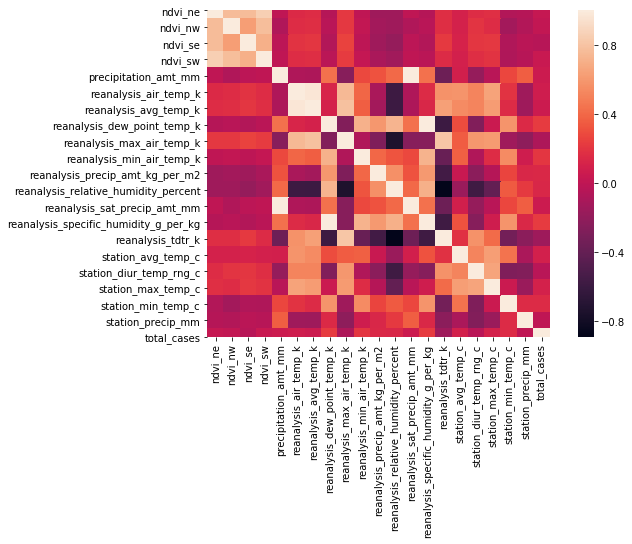

In [0]:
plt.figure(figsize = (10,6))
sns.heatmap(
    corr, 
    square=True#, 
    #annot=True
    )

In [0]:
# Funcion para determinar las columnas mas correlacionadas
def altamenteCorrelacionados(mydataframe, numtoreport):
    # Buscar La Correlacion
    cormatrix = mydataframe.corr()
    # establece las correlaciones en el triángulo 
    # diagonal o inferior a cero para que no sean reportados como los más altos:
    cormatrix *= np.tri(*cormatrix.values.shape, k=-1).T
    # Enccontrar las mejores correlaciones
    cormatrix = cormatrix.stack()
    cormatrix = cormatrix.reindex(cormatrix.abs().sort_values(ascending=False).index).reset_index()
    # Renombrando las Columnas :-)
    cormatrix.columns = ["Variable 1", "Variable 2", "Correlacion"]
    return cormatrix.head(numtoreport)


In [0]:
corr_list

['ndvi_ne',
 'ndvi_nw',
 'ndvi_se',
 'ndvi_sw',
 'precipitation_amt_mm',
 'reanalysis_air_temp_k',
 'reanalysis_avg_temp_k',
 'reanalysis_dew_point_temp_k',
 'reanalysis_max_air_temp_k',
 'reanalysis_min_air_temp_k',
 'reanalysis_precip_amt_kg_per_m2',
 'reanalysis_relative_humidity_percent',
 'reanalysis_sat_precip_amt_mm',
 'reanalysis_specific_humidity_g_per_kg',
 'reanalysis_tdtr_k',
 'station_avg_temp_c',
 'station_diur_temp_rng_c',
 'station_max_temp_c',
 'station_min_temp_c',
 'station_precip_mm',
 'total_cases']

In [0]:
altamenteCorrelacionados(dengueData,20)

,Variable 1,Variable 2,Correlacion
0,precipitation_amt_mm,reanalysis_sat_precip_amt_mm,1.000000
1,reanalysis_dew_point_temp_k,reanalysis_specific_humidity_g_per_kg,0.997775
2,reanalysis_air_temp_k,reanalysis_avg_temp_k,0.973319
3,reanalysis_relative_humidity_percent,reanalysis_tdtr_k,-0.896491
4,ndvi_ne,ndvi_sw,0.842784
5,reanalysis_max_air_temp_k,reanalysis_tdtr_k,0.799293
6,reanalysis_avg_temp_k,reanalysis_max_air_temp_k,0.783955
7,ndvi_ne,ndvi_se,0.767745
8,ndvi_nw,ndvi_sw,0.764829
9,ndvi_ne,ndvi_nw,0.764407


In [0]:
corr_list

['ndvi_ne',
 'ndvi_nw',
 'ndvi_se',
 'ndvi_sw',
 'precipitation_amt_mm',
 'reanalysis_air_temp_k',
 'reanalysis_avg_temp_k',
 'reanalysis_dew_point_temp_k',
 'reanalysis_max_air_temp_k',
 'reanalysis_min_air_temp_k',
 'reanalysis_precip_amt_kg_per_m2',
 'reanalysis_relative_humidity_percent',
 'reanalysis_sat_precip_amt_mm',
 'reanalysis_specific_humidity_g_per_kg',
 'reanalysis_tdtr_k',
 'station_avg_temp_c',
 'station_diur_temp_rng_c',
 'station_max_temp_c',
 'station_min_temp_c',
 'station_precip_mm',
 'total_cases']

In [0]:
# Listado de Predictores
# Quitando los siguientes features
# 1. reanalysis_sat_precip_amt_mm
# 2. reanalysis_dew_point_temp_k

predictors = [
    'ndvi_ne',
    'ndvi_nw',
    'ndvi_se',
    'ndvi_sw',
    'precipitation_amt_mm',
    'reanalysis_air_temp_k',
    'reanalysis_avg_temp_k',
    'reanalysis_max_air_temp_k',
    'reanalysis_min_air_temp_k',
    'reanalysis_precip_amt_kg_per_m2',
    'reanalysis_relative_humidity_percent',
    'reanalysis_specific_humidity_g_per_kg',
    'reanalysis_tdtr_k',
    'station_avg_temp_c',
    'station_diur_temp_rng_c',
    'station_max_temp_c',
    'station_min_temp_c',
    'station_precip_mm',
]


**La mayoría de los predictores altamente correlacionados con total_cases**



Los casos totales tienen un nivel muy bajo de correlación con los predictores potenciales.



Tenemos que revisar la relación con las variables rezagadas para tener en cuenta el ciclo de vida del mosquito y el tiempo entre la infección y los síntomas.

In [0]:
corr_val = corr.iloc[-1][:-1]
corr_val.sort_values()


reanalysis_tdtr_k                       -0.144539
reanalysis_max_air_temp_k               -0.080175
ndvi_se                                 -0.035041
station_diur_temp_rng_c                 -0.028225
station_precip_mm                        0.001283
ndvi_nw                                  0.017083
ndvi_ne                                  0.030306
ndvi_sw                                  0.042580
reanalysis_avg_temp_k                    0.057843
reanalysis_sat_precip_amt_mm             0.062370
precipitation_amt_mm                     0.062370
reanalysis_air_temp_k                    0.072764
station_avg_temp_c                       0.096588
station_max_temp_c                       0.106789
reanalysis_relative_humidity_percent     0.136639
reanalysis_precip_amt_kg_per_m2          0.143024
station_min_temp_c                       0.158056
reanalysis_min_air_temp_k                0.204460
reanalysis_dew_point_temp_k              0.225608
reanalysis_specific_humidity_g_per_kg    0.230099


# Distribucion del Total de Casos

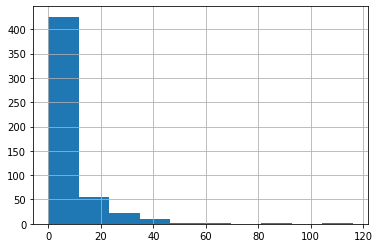

In [0]:
dengueData['total_cases'].hist()

In [0]:
print('Media de casos: ' + str(np.mean(dengueData['total_cases'])))
print('Varianza de casos: ' + str(np.var(dengueData['total_cases'])))


Media de casos: 7.565384615384615
Varianza de casos: 115.6726479289938


# Tendencias Totales

In [0]:
dengueData.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'total_cases'],
      dtype='object')

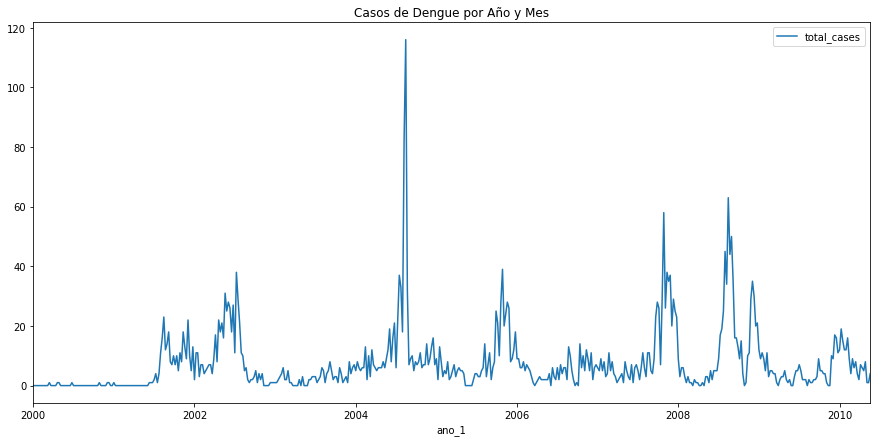

In [0]:
#dengueData['ano_semana_mes'] = dengueData['year'].map(str) + '-' + dengueData['weekofyear'].map(str)
dengueData['ano_1'] = dengueData['year'].map(str) 

dengueData.columns
dengueData.plot(kind='line',  x='ano_1', y='total_cases', figsize=[15,7],title='Casos de Dengue por Año y Mes')


In [0]:
dengueData.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'total_cases', 'ano_1'],
      dtype='object')

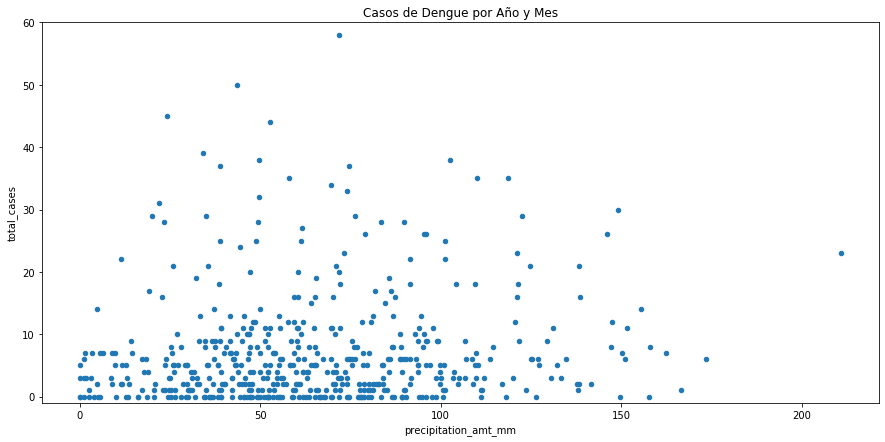

In [0]:
dengueData.plot(kind='scatter', ylim =[-1, 60],  x='precipitation_amt_mm', y='total_cases', figsize=[15,7],title='Casos de Dengue por Año y Mes')


# Total de Casos VS Todos Los Predictores

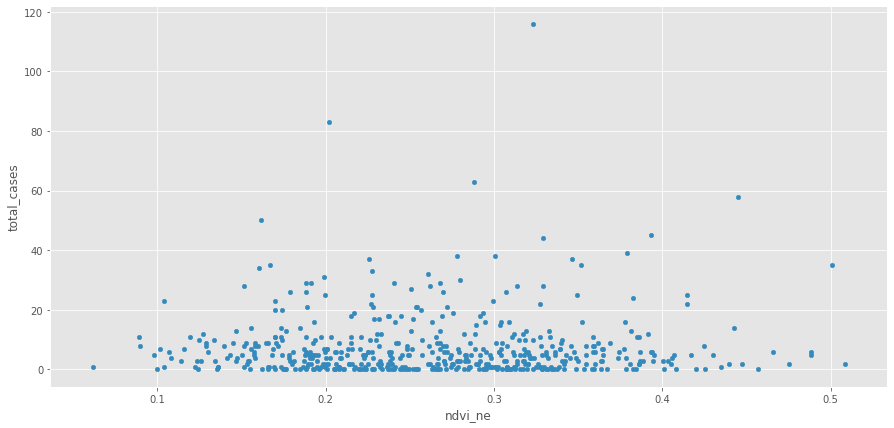

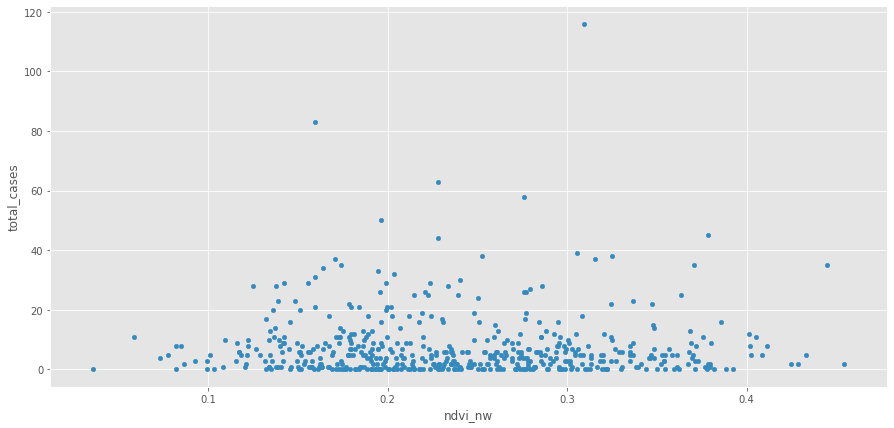

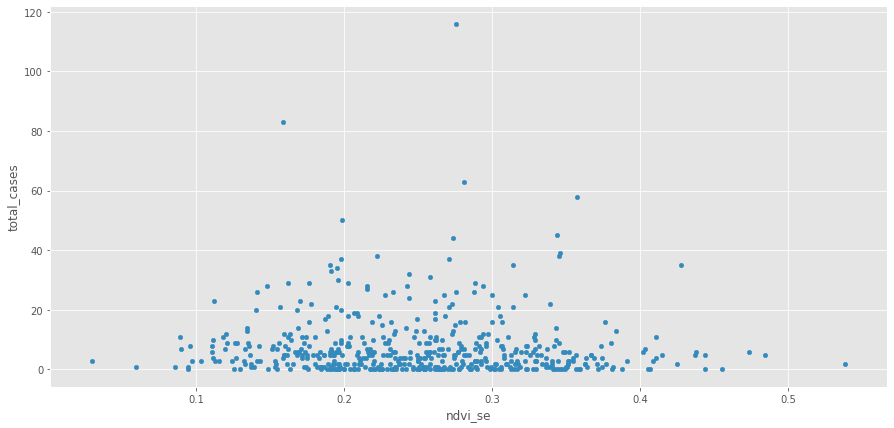

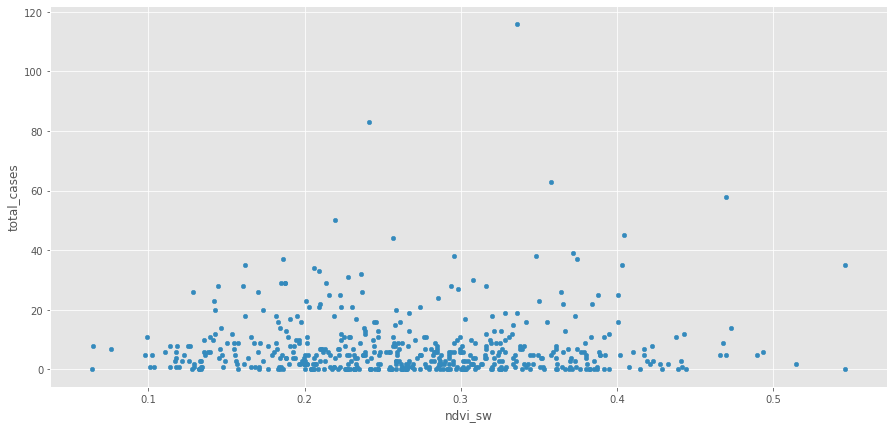

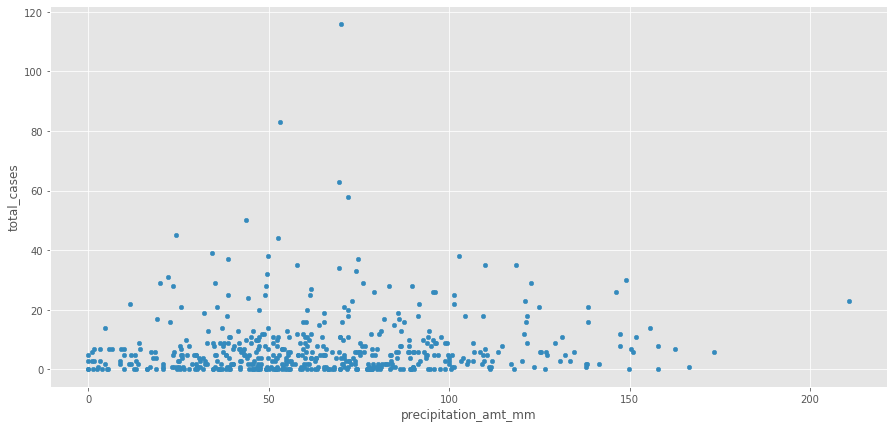

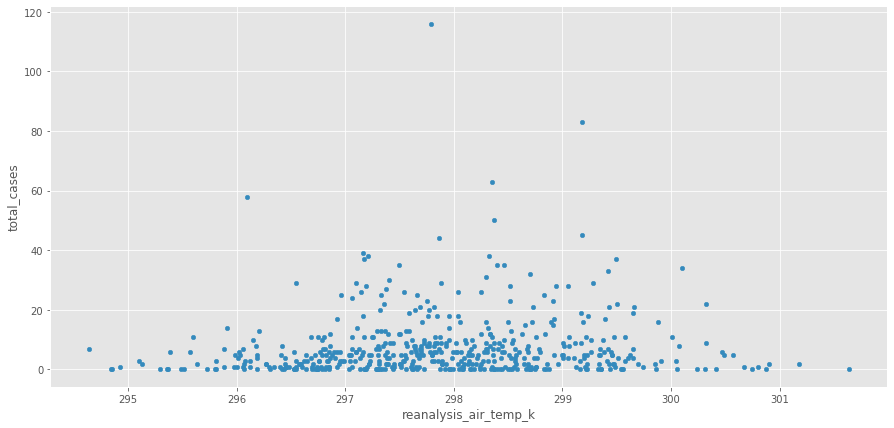

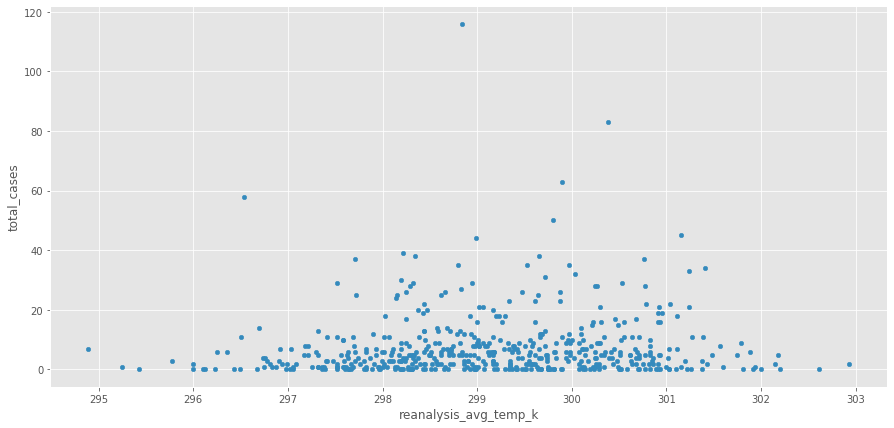

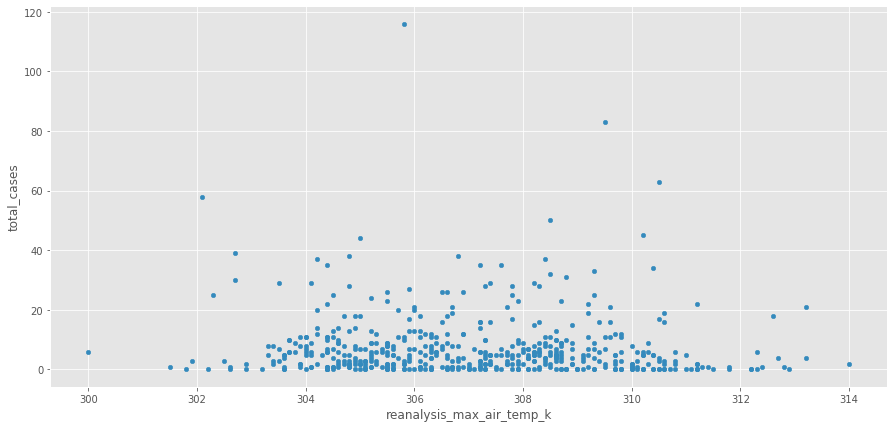

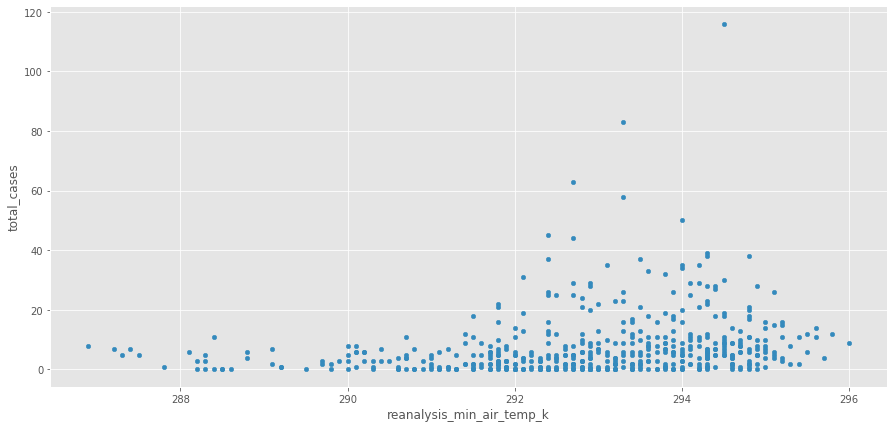

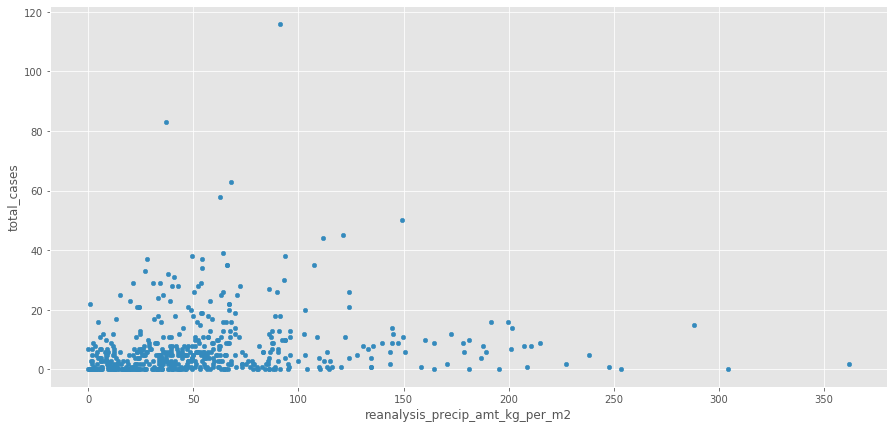

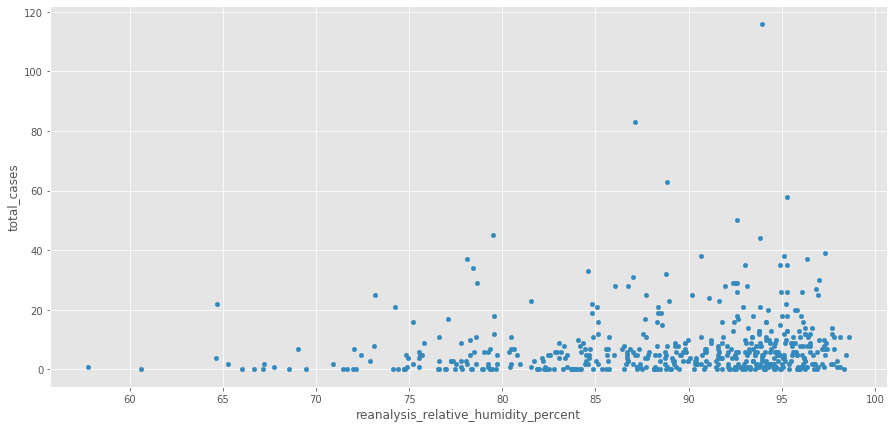

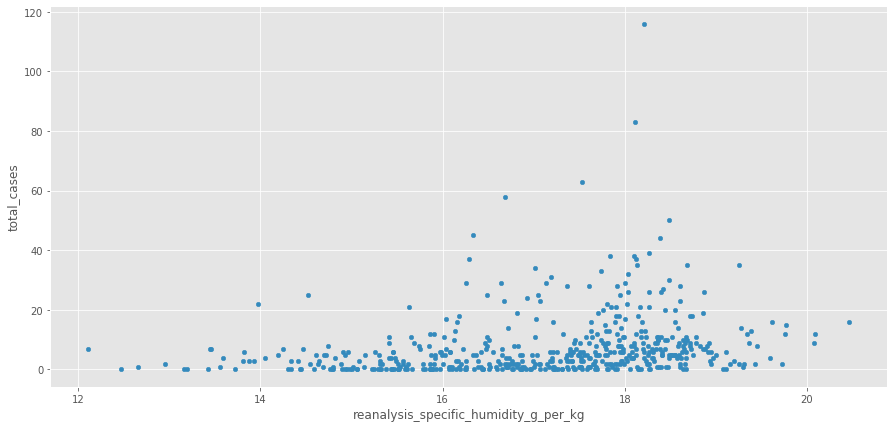

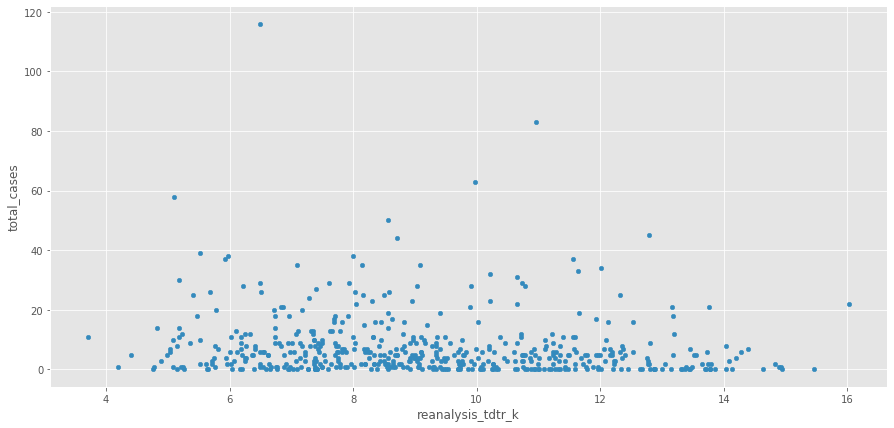

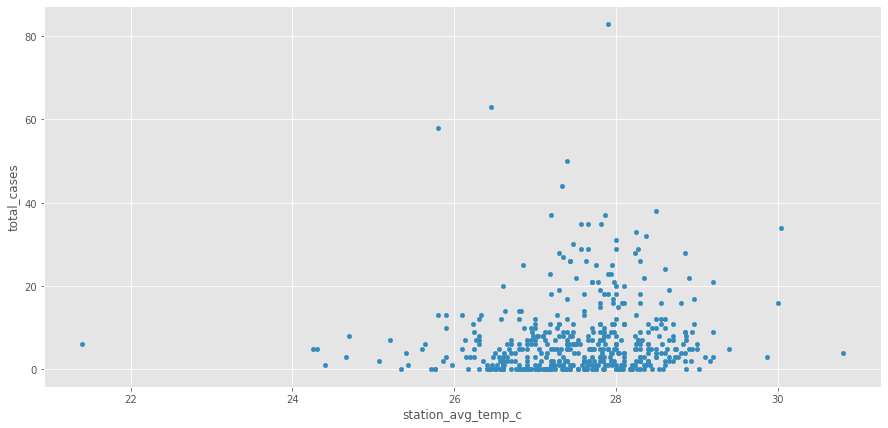

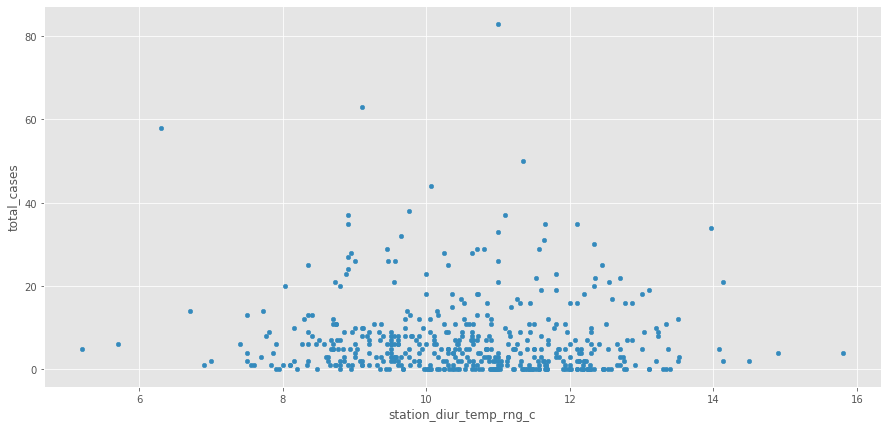

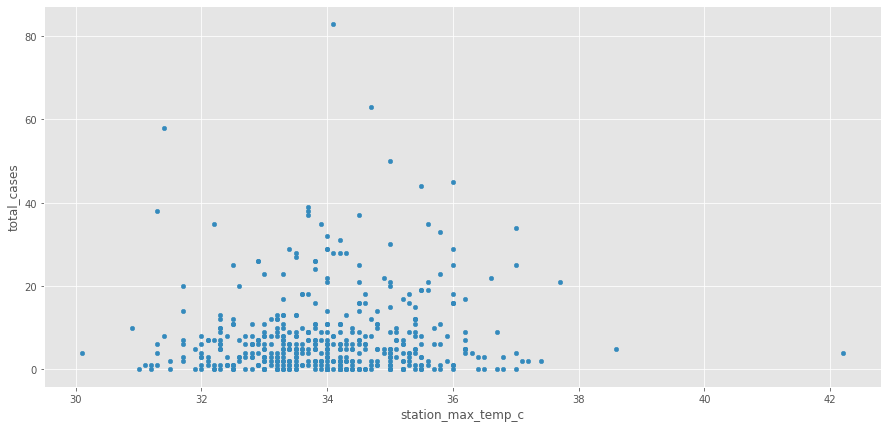

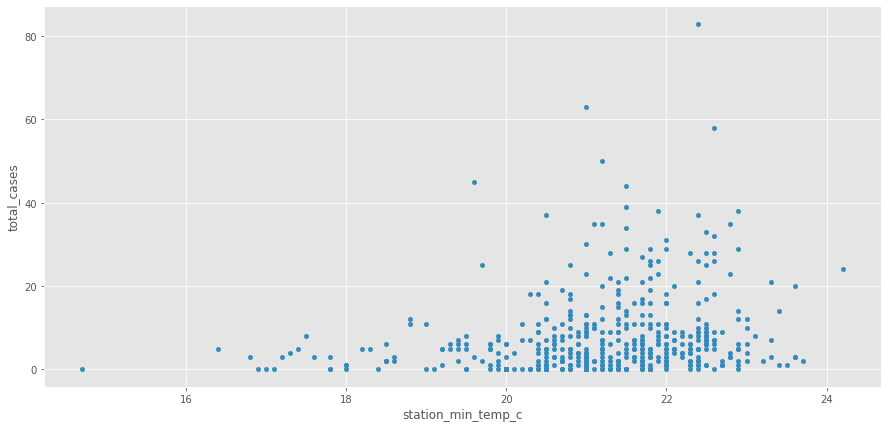

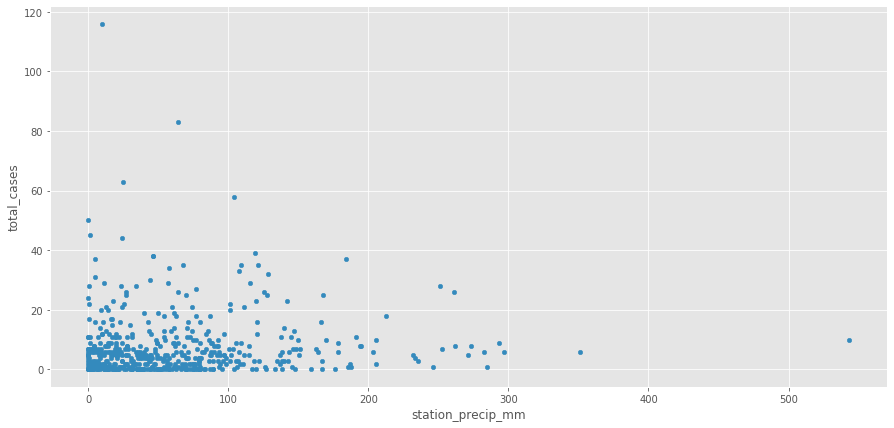

In [0]:
for i in predictors:
  dengueData.plot(kind='scatter',  
                  x=i, y='total_cases', 
                  figsize=[15,7], grid = 1
                  )

In [0]:
imptVar = abs(corr).total_cases.drop('total_cases').sort_values(ascending = False).index[0:4]
print(imptVar)

Index(['reanalysis_specific_humidity_g_per_kg', 'reanalysis_dew_point_temp_k',
       'reanalysis_min_air_temp_k', 'station_min_temp_c'],
      dtype='object')
